In [1]:
!ls

 0_CreateMarketingData_SDXDemo.ipynb   data
 1_Hive_Client_Example.ipynb	       images
 2_Atlas_Client_Example.ipynb	       README.md
'campaign_conversion (1).csv'	       requirements.txt
 connect_wh.py


### Marketing Campaign Info Dataset

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
camp_conversion_df = pd.read_csv('data/campaign_conversion.csv')

In [4]:
rg = 1000

In [5]:
camp_conversion_df = camp_conversion_df.iloc[:rg]

In [6]:
mu, sigma = 1, .4 # mean and standard deviation
s = np.random.normal(mu, sigma, rg)

In [7]:
camp_conversion_df['score'] = camp_conversion_df['conversion']+s

In [8]:
camp_conversion_df['score'].sum()

1140.1395013588176

<AxesSubplot:>

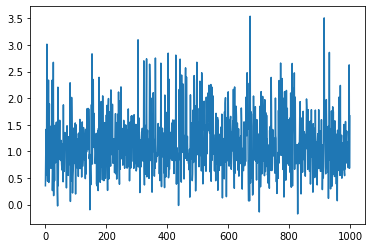

In [9]:
camp_conversion_df['score'].plot()

In [10]:
r = np.corrcoef(camp_conversion_df['score'], camp_conversion_df['conversion'])
#checking corr with new feature
r

array([[1.        , 0.66049518],
       [0.66049518, 1.        ]])

In [11]:
!pip3 install faker

In [12]:
from faker import Faker

In [13]:
fake = Faker('en_US')

In [14]:
final = {} 
final['name'] = [fake.name() for i in range(rg)]
final['street_address'] = [fake.street_address() for i in range(rg)]
final['city'] = [fake.city() for i in range(rg)]
final['postcode'] = [fake.postcode() for i in range(rg)]
final['phone_number'] = [fake.phone_number() for i in range(rg)]
final['job'] = [fake.job() for i in range(rg)]

In [15]:
personal_data = pd.DataFrame(final)

In [16]:
marketing_data = pd.concat([personal_data, camp_conversion_df], axis=1)

### Banking Info Dataset

In [18]:
import random
final = {}
rg = 500
final['name'] = marketing_data['name'].sample(n=rg, replace=False)
final['ABA_routing'] = [fake.aba() for i in range(rg)]
final['bank_country'] = [fake.bank_country() for i in range(rg)]
final['account_number'] = [fake.bban() for i in range(rg)]
final['IBAN'] = [fake.iban() for i in range(rg)]
final['swift11'] = [fake.swift11() for i in range(rg)]
final['random'] = [random.randint(0, 1) for i in range(rg)]

In [19]:
bank_data = pd.DataFrame(final)

In [20]:
bank_data.loc[bank_data['random'] == 1, 'name'] = fake.name()

In [21]:
bank_data = bank_data.drop('random', axis=1)

In [22]:
bank_data = bank_data.drop_duplicates(subset=['name'])

In [25]:
marketing_data.drop_duplicates(subset=['name']).shape

(996, 16)

In [26]:
pd.merge(bank_data, marketing_data, how="inner", on="name")

,name,ABA_routing,bank_country,account_number,IBAN,swift11,street_address,city,postcode,phone_number,...,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,score
0,Timothy Villa,027960097,GB,MYCT34568838782003,GB58LSGA26683173912521,DEWIGBM3AW2,374 Ortega Wall Apt. 549,Erinhaven,90269,001-741-708-7030,...,9,185.43,1,0,Urban,0,Web,Discount,0,1.137269
1,Dr. Brittney Evans,109322139,GB,JIPQ97079035597685,GB56QVAO76768061450961,OFQEGBXGYAT,968 Sandra Falls,Port Patrickside,83310,211.671.3299x0641,...,12,29.99,1,0,Urban,1,Web,Discount,0,0.626991
2,Melissa Lee,117508851,GB,IQVP72707690745597,GB05UKDT91683829816863,ICQUGBWM187,854 Smith Plaza,New Michelleland,87254,726.347.3977x1634,...,3,163.76,1,0,Surburban,1,Phone,Buy One Get One,0,0.620333
3,Joel Chavez,048047889,GB,MAUG31251878261383,GB86NAZG42574400811172,GZIPGBGLC7J,4096 Stephanie Mission Apt. 413,South Scottborough,57714,+1-793-414-8281x1467,...,6,40.02,0,1,Surburban,0,Web,No Offer,0,0.492777
4,Christine Rojas,047442375,GB,ZZON36072793379733,GB03AUUD66512645796606,UBFTGBWJL22,72392 Stephanie Keys,Cantuville,03755,+1-391-891-3017x9333,...,10,61.09,0,1,Surburban,0,Web,Buy One Get One,0,1.087796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Kimberly Smith,055603177,GB,ABBN55521891763209,GB31DENQ52973489665331,XUINGBZ43S4,3977 Matthews Street,Mitchellview,72974,324-603-6450x642,...,2,188.03,1,0,Urban,1,Phone,No Offer,0,1.303108
251,Patricia Munoz,036675438,GB,FZPS34103163673726,GB28HOUT92790833727123,UTAUGBRYOJM,77124 Rachel Cliffs,Melissaville,14037,(476)397-0160x70082,...,1,616.73,0,1,Urban,1,Web,Discount,0,0.572010
252,Adam Brown,104160312,GB,WGLA77820396966505,GB20TDPE92655542029136,KSMTGBMWR5F,12120 Meyer Valleys Apt. 840,Bonniefort,77274,(750)000-7816x91707,...,4,553.91,0,1,Rural,1,Phone,Discount,1,1.396688
253,Donald Bradford,025203015,GB,YJEP83907859249029,GB46JLRS94442326402119,LAJVGBP1R26,0327 John Hills,Williammouth,50064,+1-489-633-8875,...,11,133.15,1,0,Urban,1,Phone,Discount,0,1.594385


In [27]:
bank_data

,name,ABA_routing,bank_country,account_number,IBAN,swift11
565,William Clark,054218686,GB,SRQF73935111344264,GB25ZPVY78459341985231,KCYRGBKCESU
51,Timothy Villa,027960097,GB,MYCT34568838782003,GB58LSGA26683173912521,DEWIGBM3AW2
582,Dr. Brittney Evans,109322139,GB,JIPQ97079035597685,GB56QVAO76768061450961,OFQEGBXGYAT
722,Melissa Lee,117508851,GB,IQVP72707690745597,GB05UKDT91683829816863,ICQUGBWM187
764,Joel Chavez,048047889,GB,MAUG31251878261383,GB86NAZG42574400811172,GZIPGBGLC7J
...,...,...,...,...,...,...
454,Kimberly Smith,055603177,GB,ABBN55521891763209,GB31DENQ52973489665331,XUINGBZ43S4
133,Patricia Munoz,036675438,GB,FZPS34103163673726,GB28HOUT92790833727123,UTAUGBRYOJM
959,Adam Brown,104160312,GB,WGLA77820396966505,GB20TDPE92655542029136,KSMTGBMWR5F
906,Donald Bradford,025203015,GB,YJEP83907859249029,GB46JLRS94442326402119,LAJVGBP1R26


### Credit Card Info Dataset

In [28]:
import random
final = {}
rg = 200
final['name'] = bank_data['name'].sample(n=rg, replace=False)
final['credit_card_number'] = [fake.credit_card_number() for i in range(rg)]
final['credit_card_provider'] = [fake.credit_card_provider() for i in range(rg)]
final['credit_card_security_code'] = [fake.credit_card_security_code() for i in range(rg)]
final['credit_card_expire'] = [fake.credit_card_expire() for i in range(rg)]

In [29]:
credit_card_data = pd.DataFrame(final)

In [33]:
credit_card_data

,name,credit_card_number,credit_card_provider,credit_card_security_code,credit_card_expire
239,Theresa Miller,676312568527,VISA 19 digit,719,03/32
216,Susan Jensen,213199033505051,JCB 16 digit,315,03/30
321,Nicholas Ford,6011640787278941,Discover,788,11/25
662,Lisa Thomas,30364304407053,JCB 16 digit,533,07/27
309,David Lee,180005753205617,JCB 15 digit,521,02/31
...,...,...,...,...,...
783,Judy Gonzalez,38566797257389,Diners Club / Carte Blanche,163,04/29
189,Carlos Moore,4357608009000440,VISA 13 digit,697,09/25
644,John Foster,6011289867667332,Mastercard,414,05/29
853,Joseph Berry,6011932938841531,VISA 13 digit,598,10/23


In [30]:
pd.merge(bank_data, credit_card_data, how="inner", on="name")

,name,ABA_routing,bank_country,account_number,IBAN,swift11,credit_card_number,credit_card_provider,credit_card_security_code,credit_card_expire
0,Timothy Villa,027960097,GB,MYCT34568838782003,GB58LSGA26683173912521,DEWIGBM3AW2,213111331406254,American Express,4294,04/23
1,Dr. Brittney Evans,109322139,GB,JIPQ97079035597685,GB56QVAO76768061450961,OFQEGBXGYAT,4953698539600527881,American Express,653,01/27
2,Melissa Lee,117508851,GB,IQVP72707690745597,GB05UKDT91683829816863,ICQUGBWM187,4362210297974940,JCB 16 digit,902,09/25
3,Joel Chavez,048047889,GB,MAUG31251878261383,GB86NAZG42574400811172,GZIPGBGLC7J,6512728248814422,VISA 13 digit,474,01/26
4,Jonathan Bernard,046214449,GB,FRLG32642701444759,GB61XXUO63712848323159,MFRGGBU1272,4320930672333708,Discover,457,01/24
...,...,...,...,...,...,...,...,...,...,...
195,Kimberly Smith,055603177,GB,ABBN55521891763209,GB31DENQ52973489665331,XUINGBZ43S4,5233068261441575,JCB 16 digit,567,03/26
196,Patricia Munoz,036675438,GB,FZPS34103163673726,GB28HOUT92790833727123,UTAUGBRYOJM,3555349266501638,JCB 15 digit,357,12/26
197,Adam Brown,104160312,GB,WGLA77820396966505,GB20TDPE92655542029136,KSMTGBMWR5F,4967487109560120,JCB 16 digit,576,02/25
198,Donald Bradford,025203015,GB,YJEP83907859249029,GB46JLRS94442326402119,LAJVGBP1R26,340289443224405,JCB 16 digit,180,04/27


Writing Datasets to local data folder

In [31]:
marketing_data.to_csv('data/mkt_campaign_data.csv', index=False)
bank_data.to_csv('data/bank_data.csv', index=False)
credit_card_data.to_csv('data/credit_card_data.csv', index=False)

Writing Datasets to Cloud Storage

In [34]:
import os
import time
import json
import requests
import xml.etree.ElementTree as ET
import datetime

#Extracting the correct URL from hive-site.xml
tree = ET.parse('/etc/hadoop/conf/hive-site.xml')
root = tree.getroot()

for prop in root.findall('property'):
    if prop.find('name').text == "hive.metastore.warehouse.dir":
        storage = prop.find('value').text.split("/")[0] + "//" + prop.find('value').text.split("/")[2]

print("The correct Cloud Storage 2 URL is:{}".format(storage))

os.environ['STORAGE'] = storage

#Now some sample CLI commands to create a test dir and upload a file from CML 
#You can run these within a notebook, editor file, or in the session prompt (bottom right) with an exclamation mark
#Or you can run these in the terminal (top right) without the exclamation mark

!hdfs dfs -mkdir -p $STORAGE/sdxdemodir/mkt_campaign
!hdfs dfs -mkdir -p $STORAGE/sdxdemodir/bank
!hdfs dfs -mkdir -p $STORAGE/sdxdemodir/creditcard
!hdfs dfs -copyFromLocal /home/cdsw/data/mkt_campaign_data.csv $STORAGE/sdxdemodir/mkt_campaign/mkt_campaign_data.csv
!hdfs dfs -copyFromLocal /home/cdsw/data/bank_data.csv $STORAGE/sdxdemodir/bank/bank_data.csv
!hdfs dfs -copyFromLocal /home/cdsw/data/credit_card_data.csv $STORAGE/sdxdemodir/creditcard/credit_card_data.csv
!hdfs dfs -ls $STORAGE/sdxdemodir

The correct Cloud Storage 2 URL is:s3a://demo-aws-go02
22/04/18 19:16:54 WARN impl.MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
22/04/18 19:16:54 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
22/04/18 19:16:54 INFO impl.MetricsSystemImpl: s3a-file-system metrics system started
22/04/18 19:16:54 INFO s3a.IDBDelegationTokenBinding: Maybe renewing Knox Token when deploying unbonded token
22/04/18 19:16:54 INFO s3a.IDBDelegationTokenBinding: There is no Knox Token available, fetching one from IDBroker...
22/04/18 19:16:54 INFO idbroker.AbstractIDBClient: Authenticating with IDBroker requires Kerberos
22/04/18 19:16:54 INFO idbroker.AbstractIDBClient: Kerberos credentials are available, using Kerberos to establish a session. UGI=pauldefusco/d3d61668-a532-4588-8b44-84205b7df77f.mlx.cloudera.site@GO02-DEM.YLCU-ATMI.CLOUDERA.SITE (auth:KERBEROS)
Apr 18, 2022 7:16:54 PM org.apache.knox.ga

Creating time series data

In [ ]:
!pip3 install TimeSynth

     |████████████████████████████████| 11.2MB 12.3MB/s eta 0:00:01
     |████████████████████████████████| 5.8MB 59.8MB/s eta 0:00:01
     |████████████████████████████████| 143kB 74.9MB/s eta 0:00:01
     |████████████████████████████████| 522kB 62.9MB/s eta 0:00:01
  Created wheel for jitcxde-common: filename=jitcxde_common-1.4.1-cp36-none-any.whl size=14933 sha256=f60d28eb72065b493a983b58eb49f819bdff8720cb210a9e5108548c800b705b
  Stored in directory: /home/cdsw/.cache/pip/wheels/10/cd/50/f17ec174e477f7be77d38256b1ef5ca4e1da53dcdb85732817
  Created wheel for jitcdde: filename=jitcdde-1.4.0-cp36-none-any.whl size=30647 sha256=3488bc0c50288f22acc4e4ba639c291f73548d6e051e6b24637811f98e377097
  Stored in directory: /home/cdsw/.cache/pip/wheels/2c/14/0b/e7afe0b0f1dfd5327ad49307b98670c38a7df3bc4872d69178
  Created wheel for mpmath: filename=mpmath-1.1.0-cp36-none-any.whl size=532240 sha256=701d2a6ae1339c22387262e66310b400b165e2729a0149262b61967210c6a2c0
  Stored in directory: /home/cdsw/.

In [ ]:
import timesynth as ts

In [ ]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=100)
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)

In [ ]:
# Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.3)

In [ ]:
# Initializing Gaussian noise
white_noise = ts.noise.GaussianNoise(std=.3)

In [ ]:
# Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)

In [ ]:
# Sampling using the irregular time samples
samples, signals, errors = timeseries.sample(irregular_time_samples)

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples, samples+50, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with noise');

In [ ]:
# Initializing Gaussian noise
red_noise = ts.noise.RedNoise(std=0.5, tau=0.8)

In [ ]:
# Initializing TimeSeries class with the signal and noise objects
timeseries_corr = ts.TimeSeries(sinusoid, noise_generator=red_noise)

In [ ]:
# Sampling using the irregular time samples
samples_corr, signals_corr, errors_corr = timeseries_corr.sample(irregular_time_samples)

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples, samples_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with red noise')

In [ ]:
plt.plot(irregular_time_samples, errors_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Red noise');

In [ ]:

# Initializing TimeSampler
time_sampler_pp = ts.TimeSampler(stop_time=20)
# Sampling irregular time samples
irregular_time_samples_pp = time_sampler_pp.sample_irregular_time(resolution=0.05, keep_percentage=50)

In [ ]:

# Initializing Pseudoperiodic signal
pseudo_periodic = ts.signals.PseudoPeriodic(frequency=2, freqSD=0.01, ampSD=0.5)

In [ ]:
# Initializing TimeSeries class with the pseudoperiodic signal
timeseries_pp = ts.TimeSeries(pseudo_periodic)

In [ ]:

# Sampling using the irregular time samples
samples_pp, signals_pp, errors_pp = timeseries_pp.sample(irregular_time_samples_pp)

In [ ]:
# Plotting the series
plt.plot(irregular_time_samples_pp, samples_pp, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Pseudoperiodic signal');

In [ ]:
gp = ts.signals.GaussianProcess(kernel='Matern', nu=3./2)
gp_series = ts.TimeSeries(signal_generator=gp)
samples = gp_series.sample(irregular_time_samples)[0]

In [ ]:
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gaussian Process signal with Matern 3/2-kernel');

In [ ]:
car = ts.signals.CAR(ar_param=.99, sigma=5)
car_series = ts.TimeSeries(signal_generator=car)
samples = car_series.sample(irregular_time_samples)

In [ ]:
plt.plot(irregular_time_samples, (samples[0]+35)*15, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Example Continuous Autoregressive process');

In [ ]:
import random

In [ ]:
def create_cont_autoreg_process(n):
    
    dat = []
    
    sigma = 20
    ar_param = .2
    car = ts.signals.CAR(ar_param=ar_param, sigma=sigma)
    car_series = ts.TimeSeries(signal_generator=car)
    samples = car_series.sample(irregular_time_samples)
    
    dat.append((samples[0] + ar_param +5) * sigma)
    
    sigma = 4
    ar_param = .2
    car = ts.signals.CAR(ar_param=ar_param, sigma=sigma)
    car_series = ts.TimeSeries(signal_generator=car)
    samples = car_series.sample(irregular_time_samples)    
    
    dat.append((samples[0] + ar_param +5) * sigma)
    
    for i in range(n):
        sigma = random.randint(1,35)
        ar_param = random.randint(1,10)
        car = ts.signals.CAR(ar_param=ar_param/10, sigma=sigma)
        car_series = ts.TimeSeries(signal_generator=car)
        samples = car_series.sample(irregular_time_samples)
        
        dat.append((samples[0] + ar_param +5) * sigma)
        
    return dat

In [ ]:
ex = create_cont_autoreg_process(50)

In [ ]:
for i in ex:
    i[i<0] = 0

In [ ]:
spend_df = pd.DataFrame(ex)

In [ ]:
spend_df.to_csv('data/spend_new.csv', index=False)